<a href="https://colab.research.google.com/github/PradnyeshUtpat/dummy/blob/main/XGB_ANN_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##**Aquatic Weed Detection Colab Notebook**##

**Overview**

- The notebook focuses on aquatic weed detection using remote sensing data.
- Key tasks include data loading, processing, and training supervised classification models.



---

This cell is using the Google Colab library to mount Google Drive within the Colab environment. Let's break down the code:

`from google.colab import drive:` This line imports the drive module from the google.colab library, which provides functionalities for interacting with Google Drive in the Colab environment.

`drive.mount('/content/drive'):` This line mounts your Google Drive at the specified directory `(/content/drive)`. It prompts you to open a link, authorize Colab to access your Google Drive, and then paste an authentication code. Once the authentication is successful, your Google Drive will be mounted, and you can access its contents within the Colab environment.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

**Purpose:**
This code snippet changes the current working directory in the Colab environment.

**Explanation:**

`import os:` Imports the os module, which provides a way to interact with the operating system, including changing the working directory.

`os.chdir('/content'):` Changes the current working directory to '/content'. This directory change is often performed to ensure a specific location for file input/output and organization within the Colab environment.

**Usage:**
Changing the working directory is useful for managing files and accessing datasets. It can be important to set the working directory to a location where your data or project files are stored.

---

In [ ]:
import os
os.chdir('/content')

---

**Purpose:**
This code snippet copies files from a specified location in Google Drive to the current working directory in the Colab environment.

**Explanation:**

`!cp -r 'drive/MyDrive/dataset' .: `Uses the Linux command cp to copy files. The -r flag indicates a recursive copy, and the source directory is `'drive/MyDrive/dataset'.` The destination is set to the current working directory `(.)`.

**Usage:**
This step is common when you want to bring datasets or files from your Google Drive to the Colab environment for analysis or processing.

---

In [ ]:
!cp -r 'drive/MyDrive/dataset' .

---

**Install the pip packages of `imagecodecs` and `rasterio` required for image visualisation and pixel reading**

---

In [ ]:
!pip install imagecodecs
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 26.7 MB/s eta 0:00:00


---

**Purpose:**
This code snippet loads individual tiles and their corresponding binary masks for visualization and verification.

**Explanation:**

*Function Definitions:*

`load_tile(tile_path):` Opens a raster file using rasterio and reads the first band, returning the loaded tile.

`load_binary_mask(mask_path):` Opens a raster file containing a binary mask using rasterio and reads the first band, returning the loaded binary mask.
Dataset Paths:

`tiles_folder`: Path to the folder containing tile files.
masks_folder: Path to the folder containing binary mask files.
Listing Files:

`tile_files:` List of sorted tile file names in the tiles folder.
mask_files: List of sorted binary mask file names in the masks folder.

`Iteration and Display:`

Iterates through each pair of tile and mask files.
Constructs full paths for each tile and mask.
Loads the tile and binary mask using the defined functions.
Displays the loaded tile and binary mask side by side for visual verification.


`*Note : Uses plt(matplotlib) to visualise the tiles and the masks `

**Usage:**
This cell is essential for understanding the content and quality of the loaded tiles and binary masks before further processing. Adjust the file paths if your dataset structure is different.

---

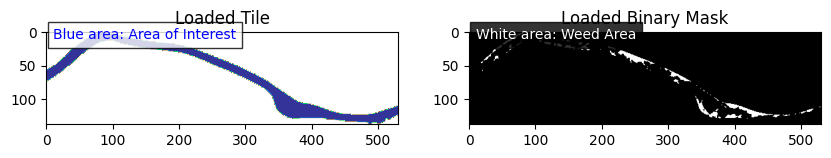

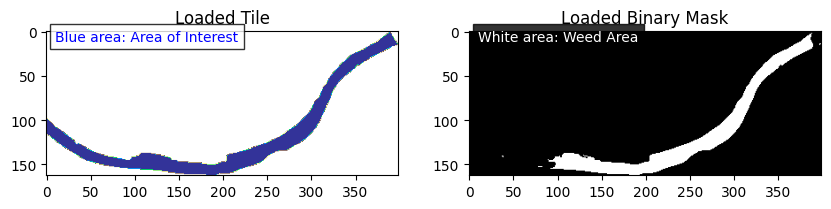

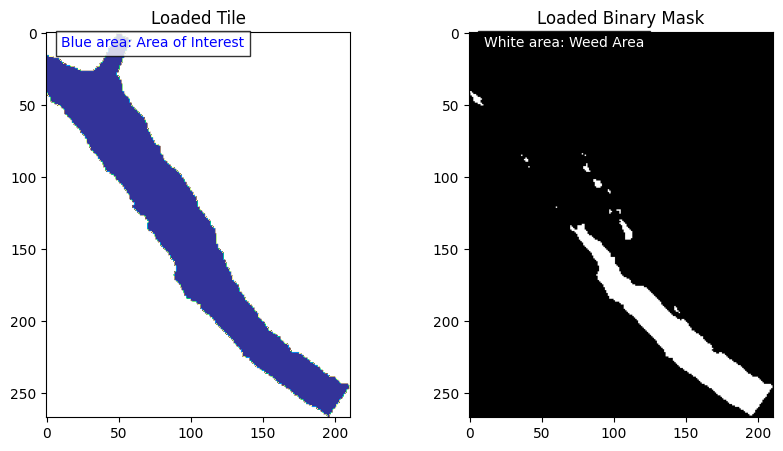

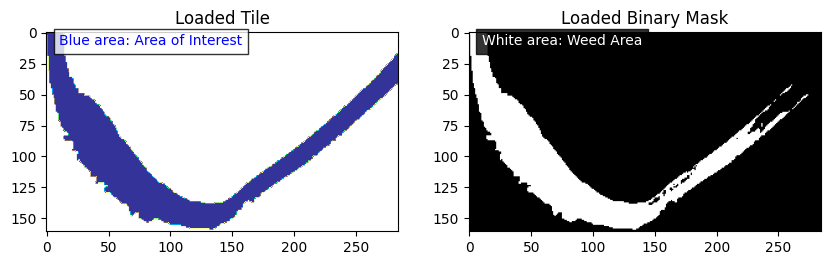

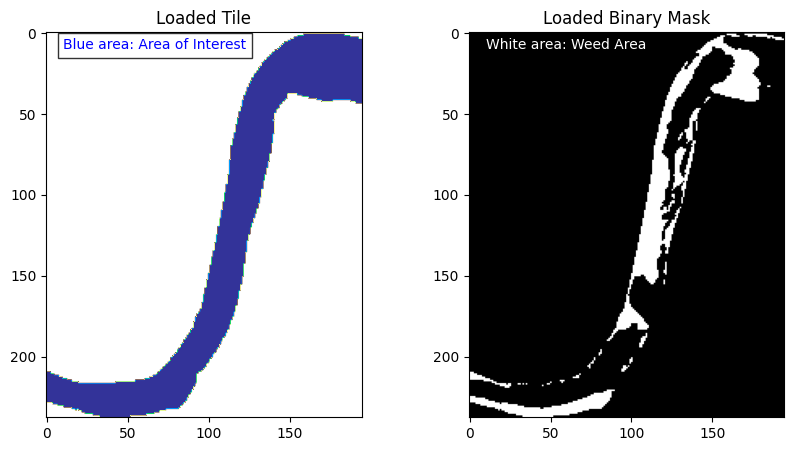

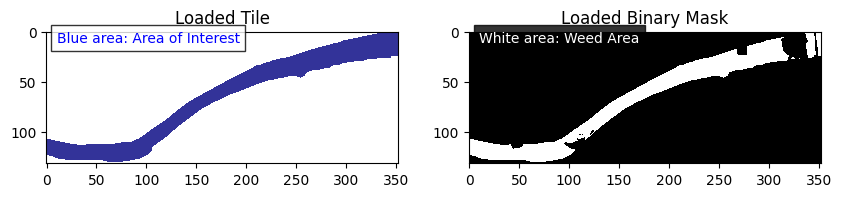

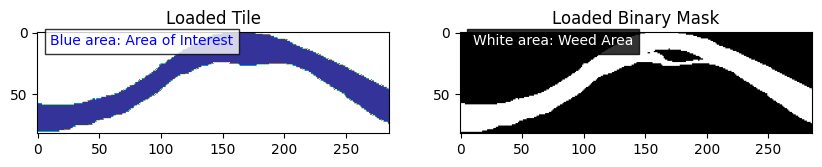

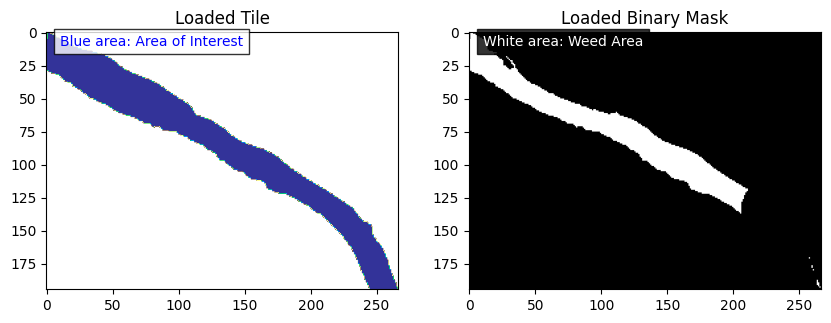

In [ ]:
import os
import matplotlib.pyplot as plt
import rasterio
from matplotlib.colors import Normalize

# Function to load a single tile
def load_tile(tile_path):
    with rasterio.open(tile_path) as src:
        return src.read(1)  # Read the first (and only) band

# Function to load a single binary mask
def load_binary_mask(mask_path):
    with rasterio.open(mask_path) as src:
        return src.read(1)  # Read the first (and only) band

# Paths to the dataset folders
tiles_folder = "dataset/tiles"
masks_folder = "dataset/masks"

# Get the list of tile and mask files
tile_files = sorted([f for f in os.listdir(tiles_folder) if f.endswith(".tif")])
mask_files = sorted([f for f in os.listdir(masks_folder) if f.endswith(".tif")])

# Iterate through each tile and mask pair
for tile_file, mask_file in zip(tile_files, mask_files):
    # Construct the full paths
    tile_path = os.path.join(tiles_folder, tile_file)
    mask_path = os.path.join(masks_folder, mask_file)

    # Load the tile and mask
    tile = load_tile(tile_path)
    binary_mask = load_binary_mask(mask_path)

    # Display the loaded tile and mask for verification
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(tile, cmap="terrain", norm=Normalize(vmin=0, vmax=65535))
    plt.title("Loaded Tile")
    plt.text(10, 10, "Blue area: Area of Interest", color='blue', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))



    plt.subplot(1, 2, 2)
    plt.imshow(binary_mask, cmap="gray")
    plt.title("Loaded Binary Mask")
    plt.text(10, 10, "White area: Weed Area", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.8))

    plt.show()


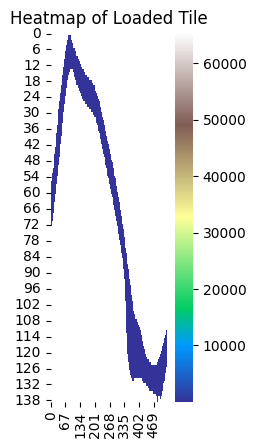

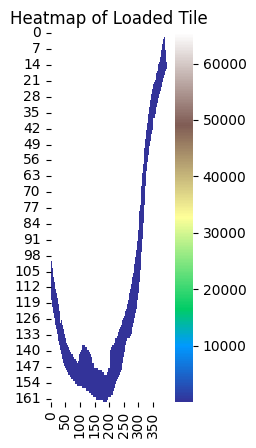

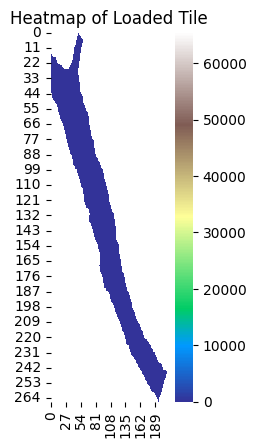

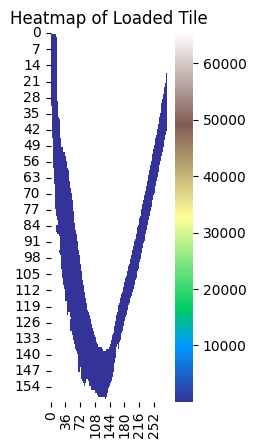

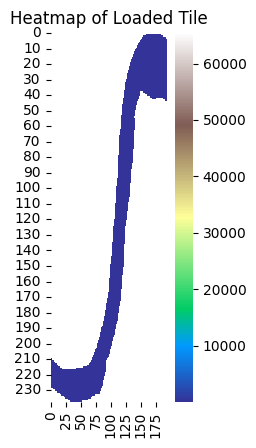

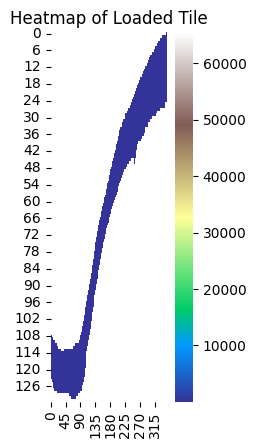

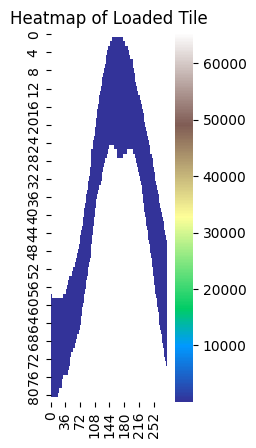

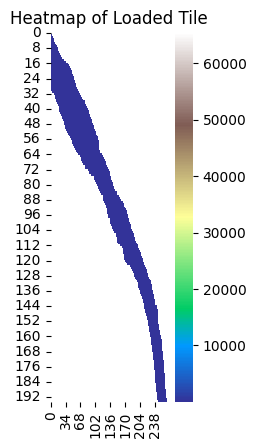

In [ ]:
for tile_file, mask_file in zip(tile_files, mask_files):
    # Construct the full paths
    tile_path = os.path.join(tiles_folder, tile_file)
    mask_path = os.path.join(masks_folder, mask_file)

    # Load the tile and mask
    tile = load_tile(tile_path)
    binary_mask = load_binary_mask(mask_path)

    plt.subplot(1, 3, 2)
    sns.heatmap(tile, cmap="terrain", annot=False, cbar=True)
    plt.title("Heatmap of Loaded Tile")

    plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import rasterio
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize

# Function to load a single tile
def load_tile(tile_path):
    with rasterio.open(tile_path) as src:
        return src.read(1)  # Read the first (and only) band

# Function to load a single binary mask
def load_binary_mask(mask_path):
    with rasterio.open(mask_path) as src:
        return src.read(1)  # Read the first (and only) band

# Paths to the dataset folders
tiles_folder = "dataset/tiles"
masks_folder = "dataset/masks"

# Output PDF file path
output_pdf_path = "output_images.pdf"

# Get the list of tile and mask files
tile_files = sorted([f for f in os.listdir(tiles_folder) if f.endswith(".tif")])
mask_files = sorted([f for f in os.listdir(masks_folder) if f.endswith(".tif")])

# Create a PDF document
with PdfPages(output_pdf_path) as pdf:
    # Iterate through each tile and mask pair
    for tile_file, mask_file in zip(tile_files, mask_files):
        # Construct the full paths
        tile_path = os.path.join(tiles_folder, tile_file)
        mask_path = os.path.join(masks_folder, mask_file)

        # Load the tile and mask
        tile = load_tile(tile_path)
        binary_mask = load_binary_mask(mask_path)

        # Display the loaded tile and mask for verification
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 3, 1)
        plt.imshow(tile, cmap="terrain", norm=Normalize(vmin=0, vmax=65535))
        plt.title("Loaded Tile")
        plt.text(10, 10, "Blue area: Area of Interest", color='blue', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

        plt.subplot(1, 3, 3)
        plt.imshow(binary_mask, cmap="gray")
        plt.title("Loaded Binary Mask")
        plt.text(10, 10, "White area: Weed Area", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.8))

        # Save the current figure to the PDF
        pdf.savefig()
        plt.close()


---

**Explanation:**

*Folder Definitions:*

`dataset_folder:` Path to the main dataset folder in Colab.

`tiles_folder:` Path to the folder containing tile files.

`masks_folder:` Path to the folder containing binary mask files.

*Lists Initialization:*

`samples:` List to store feature values for each pixel.

`labels:` List to store corresponding class labels (weed or other).

*Class Definitions:*

`class_weed:` Class label for weed (1).

`class_other:` Class label for everything else (0).

*Iteration and Loading:*

*   Iterates through each tile (1 to 8).
*   Constructs full paths for each tile and mask.
*   Loads the tile and binary mask using GDAL (gdal.Open).
*   Sampling and Dataset Creation:

* Flattens the tile and mask images.
* For each pixel, checks if it belongs to the weed or other class.
* If yes, extracts the feature (tile value) and appends it to the samples list. Appends the corresponding class label to the labels list.
* Conversion to Numpy Arrays:

Converts the lists samples and labels to numpy arrays.
DataFrame Creation and CSV Saving:

Creates two DataFrames `(samples_df and labels_df)` from the numpy arrays.
Saves these DataFrames to CSV files `(samples.csv and labels.csv)` in the Colab directory.

---


In [ ]:
from osgeo import gdal
import numpy as np
import pandas as pd

# Define folders
dataset_folder = "/content/dataset"  # Change this to the actual path in Colab
tiles_folder = os.path.join(dataset_folder, "tiles")
masks_folder = os.path.join(dataset_folder, "masks")

# Lists to store samples and labels
samples = []
labels = []

# Define the classes
class_weed = 1
class_other = 0  # Assuming this is the class for everything else

# Iterate through each tile
for i in range(1, 9):
    tile_path = os.path.join(tiles_folder, f"{i}.tif")
    mask_path = os.path.join(masks_folder, f"{i}.tif")

    # Load tile and mask using GDAL
    tile_dataset = gdal.Open(tile_path)
    mask_dataset = gdal.Open(mask_path)

    if tile_dataset is not None and mask_dataset is not None:
        tile_image = tile_dataset.ReadAsArray().flatten()
        mask_image = mask_dataset.ReadAsArray().flatten()
        # Sample and create the dataset
        for pixel_index in range(len(tile_image)):
            if mask_image[pixel_index] == class_weed or mask_image[pixel_index] == class_other:
                # Extract features
                tile_value = tile_image[pixel_index]
                # Append the sample and label
                samples.append([tile_value])
                labels.append(mask_image[pixel_index])
            else:print("Noooo Labelll")
    else:
        print(f"Failed to open tile or mask for {i}.tif")

# Convert lists to numpy arraysj
samples = np.array(samples)
labels = np.array(labels)
print(samples.shape)
print(labels.shape)


# Create DataFrames and save to CSV files in Colab directory
samples_df = pd.DataFrame(samples, columns=["Tile_Value"])
labels_df = pd.DataFrame(labels, columns=["Class"])

samples_df.to_csv("/content/dataset/samples.csv", index=False)
labels_df.to_csv("/content/dataset/labels.csv", index=False)


(409591, 1)
(409591,)


---

**Explanation:**

*CSV File Loading:*

`samples_df:` Loads the CSV file containing samples into a pandas DataFrame using `pd.read_csv("/content/dataset/samples.csv")`.

`labels_df:` Loads the CSV file containing labels into a pandas DataFrame using `pd.read_csv("/content/dataset/labels.csv")`.

*DataFrame Display:*

Prints the first few rows of each DataFrame using `head()` to provide a preview of the loaded data.

---

In [ ]:
import pandas as pd

# Load samples and labels CSV files
samples_df = pd.read_csv("/content/dataset/samples.csv")
labels_df = pd.read_csv("/content/dataset/labels.csv")

# Display the first few rows of each DataFrame
print("Samples:")
print(samples_df.head())

print("\nLabels:")
print(labels_df.head())


Samples:
   Tile_Value
0     65535.0
1     65535.0
2     65535.0
3     65535.0
4     65535.0

Labels:
   Class
0      0
1      0
2      0
3      0
4      0


---

**Explanation:**

*Check for Label Existence:*

`has_class_1:` Checks if label 1 (water weeds) exists in the loaded labels DataFrame.

*Label Counting and Percentage Calculation:*

`count_label_1:` Counts the occurrences of label 1 (water weeds) using np.count_nonzero`(labels == 1)`.

`count_label_2:` Counts the occurrences of label 2 (other) using np.count_zero`(labels == 0)`.

`total_samples:` Calculates the total number of samples in the dataset.

`percentage_label_1:` Calculates the percentage of label 1 in the dataset.
`percentage_label_2:` Calculates the percentage of label 2 in the dataset.

*Results Display:*

Prints whether label 1 exists in the dataset.
Displays the percentages of label 1 (water weeds) and label 0 (other) in the dataset.

---

In [ ]:
# Check if there are any entries with label 1
has_class_1 = 1 in labels_df

if has_class_1:
    print("Label 1 (water weeds) exists in the dataset.")
else:
    print("Label 1 (water weeds) is not present in the dataset.")

# Count the occurrences of label 1 (water weeds) and label 2 (other)
count_label_1 = np.count_nonzero(labels == 1)
count_label_2 = np.count_nonzero(labels == 0)

# Calculate the percentages
total_samples = len(labels)
percentage_label_1 = (count_label_1 / total_samples) * 100
percentage_label_2 = (count_label_2 / total_samples) * 100

print(f"Percentage of Label 1 (water weeds): {percentage_label_1:.2f}%")
print(f"Percentage of Label 2 (other): {percentage_label_2:.2f}%")

Label 1 (water weeds) is not present in the dataset.
Percentage of Label 1 (water weeds): 9.33%
Percentage of Label 2 (other): 90.67%



---
**Explanation:**

*Histogram Plotting:*

Uses `samples_df.hist(bins=50, figsize=(15, 10))` to generate histograms for each column in the samples_df DataFrame.
bins=50 specifies the number of bins in the histogram.
`figsize=(15, 10)` sets the size of the figure.
*Visualization:*

`plt.show()`: Displays the generated histograms.

---


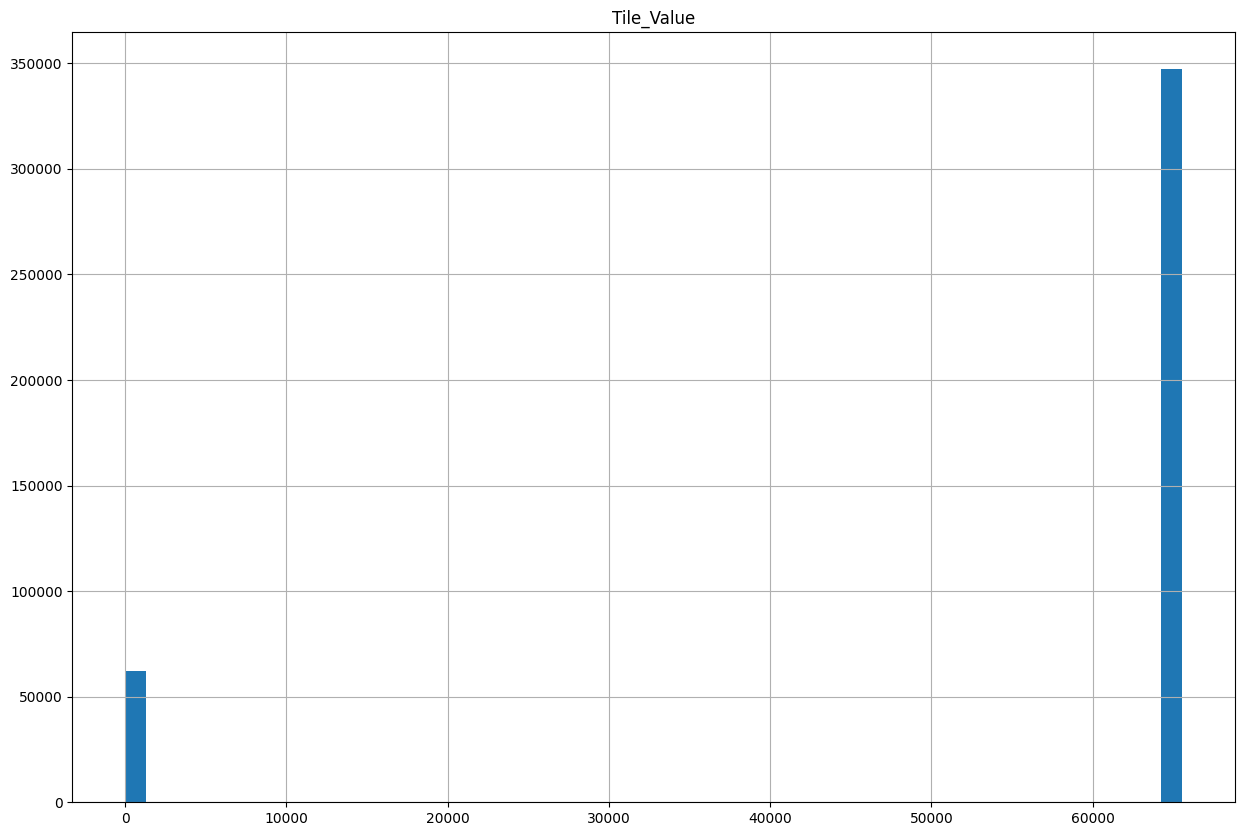

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for each column in samples_df
samples_df.hist(bins=50, figsize=(15, 10))
plt.show()


---

**Explanation:**

*Counting Non-65535 Values:*

`non_65535_counts:` Calculates the count of non-65535 values for each column in the samples_df DataFrame.

`(samples_df != 65535):` Creates a boolean DataFrame where each element is True if the corresponding element in samples_df is not equal to 65535, and False otherwise.

`.sum():` Calculates the sum along the axis, counting the number of True values (non-65535) for each column.

*Printing Results:*

`print(non_65535_counts):` Displays the count of non-65535 values for each column in the samples_df DataFrame.

---

In [ ]:

non_65535_counts = (samples_df != 65535).sum()
print(non_65535_counts)


Tile_Value    62300
dtype: int64


---

**Explanation:**

*Iteration Through Columns:*

`for column in samples_df.columns:` Iterates through each column in the samples_df DataFrame.

*Filtering and Displaying Values:*

`non_65535_values:` Filters values in the current column where the value is not equal to 65535.

`samples_df[samples_df[column] != 65535][column].values[:10]:` Selects values that meet the condition and limits the output to the first 10 values.
`print(non_65535_values)`
Prints the values in the current column that are not equal to 65535.

---

In [ ]:
for column in samples_df.columns:
    non_65535_values = samples_df[samples_df[column] != 65535][column].values[:10]
    print(f"\nValues in column {column} that are not equal to 65535:")
    print(non_65535_values)



Values in column Tile_Value that are not equal to 65535:
[0.27432707 0.28158662 0.28036514 0.26246983 0.23510662 0.20385545
 0.23253746 0.25025415 0.18862359 0.1230136 ]



---


**Explanation:**

*Iteration Through Columns:*

`for column in samples_df.columns:` Iterates through each column in the samples_df DataFrame.

*Filtering and Calculating Min-Max:*

`non_65535_values:` Filters values in the current column where the value is not equal to 65535.

Checks if there are any non-65535 values in the column.

If there are non-65535 values:
Calculates the maximum and minimum non-65535 values using `np.max` and `np.min`.
Prints the `column name, maximum, and minimum non-65535 values`.
If there are no non-65535 values, prints a message indicating this.

---

In [ ]:
for column in samples_df.columns:
    non_65535_values = samples_df[samples_df[column] != 65535][column].values
    if len(non_65535_values) > 0:
        max_value = np.max(non_65535_values)
        min_value = np.min(non_65535_values)
        print(f"\nColumn: {column}")
        print(f"Maximum non-65535 value: {max_value}")
        print(f"Minimum non-65535 value: {min_value}")
    else:
        print(f"\nColumn: {column}")
        print("No non-65535 values in this column.")



Column: Tile_Value
Maximum non-65535 value: 0.4433108
Minimum non-65535 value: 0.0


---
**Explanation:**

*Filtering Pixels within ROI:*

`roi_samples_df:` Creates a new DataFrame containing only rows where the 'Tile_Value' column is not equal to 65535. This filters out pixels with a value of 65535.

*Updating Labels for ROI:*

Updates the `'Class'` column in `roi_samples_df` to consider weed presence (1) as positive and absence (0) as negative. This is done by mapping labels from the original `labels_df`.

*Verification of Changes:*

Prints the maximum and minimum values for each column in the processed `roi_samples_df` DataFrame to verify the changes.

---

In [ ]:
# Keep only pixels within the ROI where values are not 65535
roi_samples_df = samples_df[samples_df['Tile_Value'] != 65535].copy()

# Update the labels to consider weed presence (1) as positive and absence (0) as negative
roi_samples_df['Class'] = labels_df.loc[roi_samples_df.index]['Class']

# Verify the changes
print("\nAfter ROI processing:")
for column in roi_samples_df.columns:
    print(f"\nColumn: {column}")
    print(f"Maximum value: {np.max(roi_samples_df[column])}")
    print(f"Minimum value: {np.min(roi_samples_df[column])}")



After ROI processing:

Column: Tile_Value
Maximum value: 0.4433108
Minimum value: 0.0

Column: Class
Maximum value: 1
Minimum value: 0


---

**Explanation:**

*Counting Remaining Samples:*

`num_remaining_samples:` Calculates the number of remaining samples in the processed roi_samples_df DataFrame.

*Display Result:*

`print(f"\nNumber of remaining samples: {num_remaining_samples}"):`

 Prints the number of remaining samples after the ROI processing.

---


In [ ]:
# Check the number of remaining samples
num_remaining_samples = len(roi_samples_df)
print(f"\nNumber of remaining samples: {num_remaining_samples}")



Number of remaining samples: 62300


---

**Explanation:**

*CSV Loading:*

Loads the original samples and labels CSV files from the dataset folder using `pd.read_csv`.

*Finding Valid Indices:*

`valid_indices:` Finds the indices of samples where the 'Tile_Value' is not equal to 65535.

*Creating New DataFrames:*

`new_samples_df:` Creates a new samples DataFrame (new_samples_df) by selecting rows where 'Tile_Value' is not equal to 65535.
`new_labels_df:` Creates a new labels DataFrame (new_labels_df) by selecting corresponding rows from the original labels DataFrame.

*Saving to CSVs:*

Saves the new samples and labels DataFrames to CSV files `(new_samples.csv and new_labels.csv)` in the dataset folder.

---

In [ ]:
import pandas as pd
import numpy as np

# Load the original samples and labels CSVs from the dataset folder
samples_df = pd.read_csv("dataset/samples.csv")
labels_df = pd.read_csv("dataset/labels.csv")

# Find indices of samples where Tile_Value is not 65535
valid_indices = samples_df[samples_df['Tile_Value'] != 65535].index

# Create new samples and labels DataFrames without 65535 values
new_samples_df = samples_df.loc[valid_indices]
new_labels_df = labels_df.loc[valid_indices]

# Save the new samples and labels to CSVs in the dataset folder
new_samples_df.to_csv("dataset/new_samples.csv", index=False)
new_labels_df.to_csv("dataset/new_labels.csv", index=False)


---

**Explanation:**

*CSV Loading:*

Loads the new samples and labels CSV files `(new_samples.csv / new_labels.csv)` created in the previous step.

*Checking Number of Entries:*

`num_entries_samples:` Calculates the number of entries (rows) in the samples_df.
`num_entries_labels:` Calculates the number of entries (rows) in the labels_df.

*Displaying Results:*

Prints the number of entries in the new samples and labels DataFrames.



```python
print(f"Number of entries in new_samples.csv: {num_entries_samples}")
print(f"Number of entries in new_labels.csv: {num_entries_labels}")

```









---

In [ ]:
import pandas as pd

# Load the new CSV files
samples_df = pd.read_csv("dataset/new_samples.csv")
labels_df = pd.read_csv("dataset/new_labels.csv")

# Check the number of entries
num_entries_samples = samples_df.shape[0]
num_entries_labels = labels_df.shape[0]

print(f"Number of entries in new_samples.csv: {num_entries_samples}")
print(f"Number of entries in new_labels.csv: {num_entries_labels}")


Number of entries in new_samples.csv: 62300
Number of entries in new_labels.csv: 62300


---


**Explanation:**

*Data Loading:*

Loads the preprocessed samples and labels CSV files (`new_samples.csv` and `new_labels.csv`).

*Flattening for Histogram Analysis:*

`flat_samples:` Flattens the images in the samples DataFrame to create a 1D array for histogram analysis.

*Histogram Plots:*

Pixel Value Distribution in Samples:
Plots a histogram of pixel values in the samples with 50 bins and kernel density estimation (KDE).

Label Distribution:
Plots a histogram of label distribution in the labels DataFrame.
Visualization:

Displays the generated histograms for visual analysis.

---

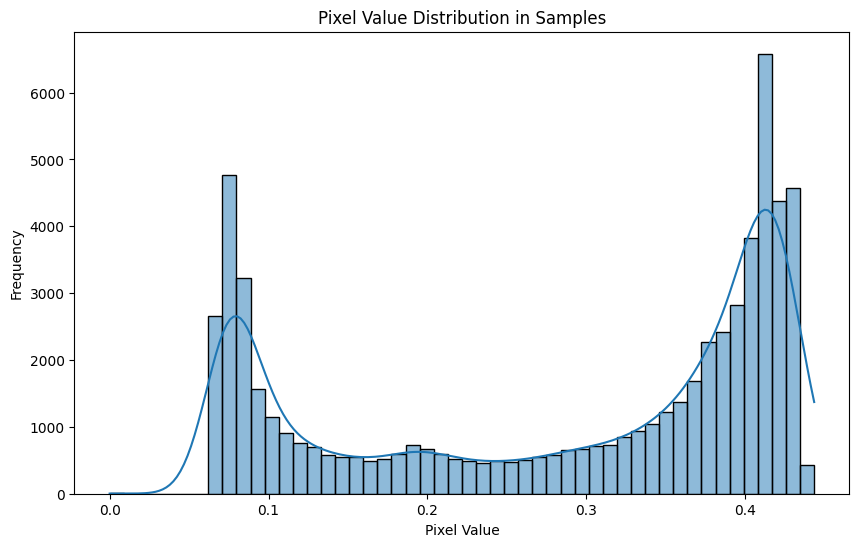

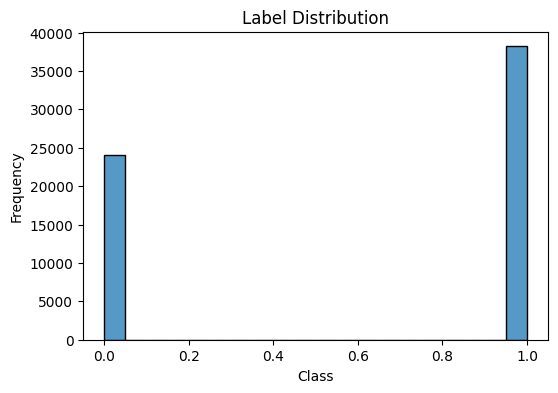

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
samples = pd.read_csv('/content/dataset/new_samples.csv')
labels = pd.read_csv('/content/dataset/new_labels.csv')

# Flatten the images for histogram analysis
flat_samples = samples.values.flatten()

# Plot histogram for samples
plt.figure(figsize=(10, 6))
plt.title('Pixel Value Distribution in Samples')
sns.histplot(flat_samples, bins=50, kde=True)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for labels
plt.figure(figsize=(6, 4))
plt.title('Label Distribution')
sns.histplot(labels['Class'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


---
**Explanation:**

*Displaying Columns:*

`print("Samples CSV Columns:")`: Prints the column names in the samples CSV.

`print(samples_df.columns)`: Displays the columns of the samples DataFrame.

`print("\nLabels CSV Columns:")`: Prints a separator line and then "Labels CSV Columns:" to differentiate from the samples CSV.

`print(labels_df.columns)`: Displays the columns of the labels DataFrame.

---

In [ ]:
print("Samples CSV Columns:")
print(samples_df.columns)

print("\nLabels CSV Columns:")
print(labels_df.columns)


Samples CSV Columns:
Index(['Tile_Value'], dtype='object')

Labels CSV Columns:
Index(['Class'], dtype='object')


---

**Explanation:**

*Loading Labels:*

`labels_path:` Specifies the path to the labels CSV file `(new_labels.csv)`.

`labels_df:` Loads the labels CSV file into a pandas DataFrame.

*Class Distribution Display:*

`class_distribution`: Calculates the class distribution using `value_counts()` on the 'Class' column.
`print(class_distribution)`: Displays the class distribution, showing the count of each class.

---

In [ ]:
import pandas as pd

# Load the labels CSV file
labels_path = 'dataset/new_labels.csv'
labels_df = pd.read_csv(labels_path)

# Display the class distribution
class_distribution = labels_df['Class'].value_counts()
print(class_distribution)


1    38204
0    24096
Name: Class, dtype: int64


---
**Explanation:**

*Loading Samples:*

`samples_path:` Specifies the path to the samples CSV file `(new_samples.csv)`.

`samples_df:` Loads the samples CSV file into a pandas DataFrame.

*Displaying First Few Rows:*

`print(samples_df.head())`: Displays the first few rows of the samples DataFrame.

---

In [ ]:
import pandas as pd

# Load the samples CSV file
samples_path = 'dataset/new_samples.csv'
samples_df = pd.read_csv(samples_path)

# Display the first few rows of the samples DataFrame
print(samples_df.head())


   Tile_Value
0    0.274327
1    0.281587
2    0.280365
3    0.262470
4    0.235107


---

**Explanation:**

*Loading Labels:*

`labels_path:` Specifies the path to the labels CSV file `(new_labels.csv)`.
`labels_df:` Loads the labels CSV file into a pandas DataFrame.

*Displaying First Few Rows:*

`print(labels_df.head()):` Displays the first few rows of the labels DataFrame.

In [ ]:
# Load the labels CSV file
labels_path = 'dataset/new_labels.csv'
labels_df = pd.read_csv(labels_path)

# Display the first few rows of the labels DataFrame
print(labels_df.head())


   Class
0      1
1      1
2      1
3      1
4      1


---

**Explanation:**

*File Download:*

`csv_file_path:` Specifies the path to the samples CSV file `(samples.csv)`.

`files.download(csv_file_path)`: Initiates the download of the specified CSV file using Google Colab's files module.

---

In [ ]:
from google.colab import files

# Provide the path to your CSV file
csv_file_path = '/content/dataset/samples.csv'

# Use files.download to trigger the download
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **Install tf for model implementation** ###
---

In [ ]:
!pip install tensorflow


---
**Explanation:**

*Library Import:*

`import numpy as np:` Imports the NumPy library with the alias np.

`import pandas as pd:` Imports the Pandas library with the alias pd.

`from sklearn.model_selection import train_test_split`: Imports the train_test_split function from scikit-learn for splitting datasets.

`from sklearn.utils import shuffle`: Imports the shuffle function from scikit-learn for shuffling datasets.

`from tensorflow import keras`: Imports the Keras module from TensorFlow.

`from tensorflow.keras import layers:` Imports the layers submodule from Keras for building neural network models.

---

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers

---

**Explanation:**

*CSV Loading:*

`samples_path:` Specifies the path to the samples CSV file `(new_samples.csv)`.
`labels_path:` Specifies the path to the labels CSV file` (new_labels.csv)`.

`samples_df:` Loads the samples CSV file into a pandas DataFrame.
`labels_df:` Loads the labels CSV file into a pandas DataFrame.

---

In [ ]:
# Load the samples and labels CSV files
samples_path = 'dataset/new_samples.csv'
labels_path = 'dataset/new_labels.csv'

samples_df = pd.read_csv(samples_path)
labels_df = pd.read_csv(labels_path)



---
**Explanation:**

*Merging DataFrames:*

`pd.concat([samples_df, labels_df], axis=1)`: Concatenates the samples and labels DataFrames along the columns (axis=1), creating a single DataFrame (data_df) with samples and corresponding labels.

*Shuffling DataFrame:*

`data_df = shuffle(data_df):` Shuffles the rows of the merged DataFrame `(data_df)` to randomize the order of samples and labels.

---

In [ ]:
# Merge samples and labels into a single DataFrame
data_df = pd.concat([samples_df, labels_df], axis=1)

# Shuffle the DataFrame
data_df = shuffle(data_df)


---
**Explanation:**

*Feature and Label Extraction:*

`X = data_df.drop('Class', axis=1):` Extracts features (X) by removing the 'Class' column from the merged DataFrame (data_df).

`y = data_df['Class']:` Extracts labels (y) by selecting only the 'Class' column from the merged DataFrame.

*Dataset Splitting:*

`train_test_split(X, y, test_size=0.2, random_state=42):` Splits the dataset into training and testing sets.
`X_train, X_test:` Feature sets for training and testing.
`y_train, y_test:` Label sets for training and testing.
`test_size=0.2:` Specifies that 20% of the data will be used for testing.
`random_state=42:` Provides a seed for reproducibility.

In [ ]:
# Extract features (X) and labels (y)
X = data_df.drop('Class', axis=1)
y = data_df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ANN model 1

---

**Explanation:**

*Sequential Model:*

`model = keras.Sequential([...])`: Creates a sequential neural network model using Keras.

*Layers:*

`layers.InputLayer(input_shape=(1,))`: Input layer specifying the input shape for a single feature.

`layers.Dense(64, activation='relu')`: Fully connected layer with 64 units and ReLU activation function.

`layers.Dropout(0.5)`: Dropout layer with a dropout rate of 0.5 for regularization.

`layers.Dense(1, activation='sigmoid')`: Output layer for binary classification with a sigmoid activation function.

---

In [ ]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(1,)),  # Input shape for a single feature
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

XGBOOST

---
**Explanation:**

*XGBoost Import:*

`from xgboost import XGBClassifier:` Imports the XGBoost classifier from the XGBoost library.

*Scikit-Learn Imports:*

`from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score`: Imports functions and classes for splitting datasets, cross-validation, and evaluation metrics.
`from sklearn.metrics import accuracy_score, confusion_matrix, classification_report`: Imports metrics for evaluating classification models.

---

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

---


**Explanation:**

*Evaluation Metric Function:*

`eval_metric(model, X_train, y_train, X_test, y_test):` Defines a function for evaluating a classification model.

Calculates and prints confusion matrices and classification reports for both the training and testing sets.

Computes and prints the accuracy score for the testing set.

---

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print("confusion matrix")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("confusion matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    dt_acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy :",dt_acc_score*100,'\n')

---
**Explanation:**

*XGBoost Classifier Training:*

`params:` Specifies the hyperparameters for the XGBoost classifier.

`classifier7 = XGBClassifier(**params):` Initializes the XGBoost classifier with the specified hyperparameters.

`classifier7.fit(X_train, y_train):` Trains the classifier on the training data.

*Prediction and Evaluation:*

`y_pred = classifier7.predict(X_test)`: Generates predictions on the testing set.

`eval_metric(classifier7, X_train, y_train, X_test, y_test):` Calls the evaluation metric function to assess the model's performance on both training and testing sets.

---

In [ ]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.5,
            'n_estimators':500
        }
classifier7 = XGBClassifier(**params)
classifier7.fit(X_train, y_train)
y_pred = classifier7.predict(X_test)
eval_metric(classifier7, X_train, y_train, X_test, y_test)

Test_Set
confusion matrix
[[4583  201]
 [ 155 7521]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4784
           1       0.97      0.98      0.98      7676

    accuracy                           0.97     12460
   macro avg       0.97      0.97      0.97     12460
weighted avg       0.97      0.97      0.97     12460


Train_Set
confusion matrix
[[18560   752]
 [  535 29993]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     19312
           1       0.98      0.98      0.98     30528

    accuracy                           0.97     49840
   macro avg       0.97      0.97      0.97     49840
weighted avg       0.97      0.97      0.97     49840


Accuracy : 97.14285714285714 



---

**Explanation:**

*Cross-Validation Setup:*

`cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True):` Initializes a stratified k-fold cross-validator with 5 folds, random state 1, and shuffling.

*Cross-Validation Scoring:*

`scores = cross_val_score(classifier7, X, y, scoring='accuracy', cv=cv, n_jobs=-1)`: Performs cross-validation using the XGBoost classifier, calculating accuracy scores for each fold.

`print(scores, scores.mean() * 100):` Prints the accuracy scores for each fold and the mean accuracy across all folds.

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(classifier7, X,y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores,scores.mean()*100)

[0.97447833 0.97134831 0.9747191  0.97447833 0.97391653] 97.37881219903691


---
**Explanation:**

*Accuracy Plotting:*

`plt.plot(history.history['accuracy'], color='red', label='train'):` Plots the training accuracy over epochs in red.

`plt.plot(history.history['val_accuracy'], color='blue', label='validation'):` Plots the validation accuracy over epochs in blue.

`plt.legend():` Displays a legend indicating the 'train' and 'validation' curves.

---

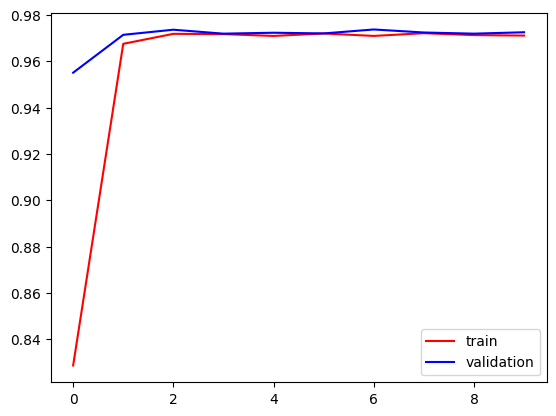

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

---

---

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1246/1246 [==============================] - 19s 5ms/step - loss: 0.4001 - accuracy: 0.8286 - val_loss: 0.2251 - val_accuracy: 0.9551
Epoch 2/10
1246/1246 [==============================] - 6s 5ms/step - loss: 0.1770 - accuracy: 0.9675 - val_loss: 0.1232 - val_accuracy: 0.9714
Epoch 3/10
1246/1246 [==============================] - 5s 4ms/step - loss: 0.1147 - accuracy: 0.9718 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 4/10
1246/1246 [==============================] - 5s 4ms/step - loss: 0.0905 - accuracy: 0.9717 - val_loss: 0.0737 - val_accuracy: 0.9719
Epoch 5/10
1246/1246 [==============================] - 6s 5ms/step - loss: 0.0804 - accuracy: 0.9709 - val_loss: 0.0671 - val_accuracy: 0.9723
Epoch 6/10
1246/1246 [==============================] - 5s 4ms/step - loss: 0.0757 - accuracy: 0.9720 - val_loss: 0.0641 - val_accuracy: 0.9720
Epoch 7/10
1246/1246 [==============================] - 5s 4ms/step - loss: 0.0745 - accuracy: 0.9709 - val_loss: 0.0642 - val_accuracy

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

390/390 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9716
Test accuracy: 0.9715890884399414


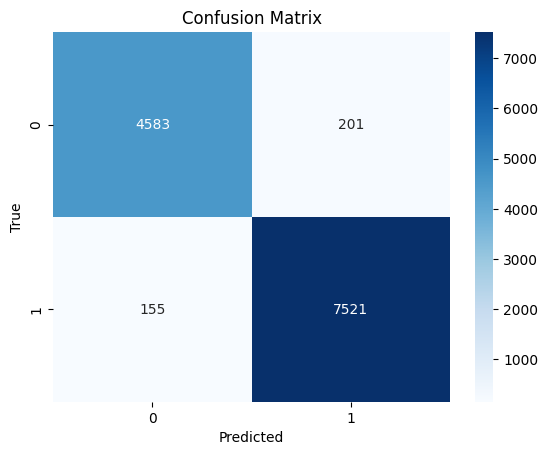

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


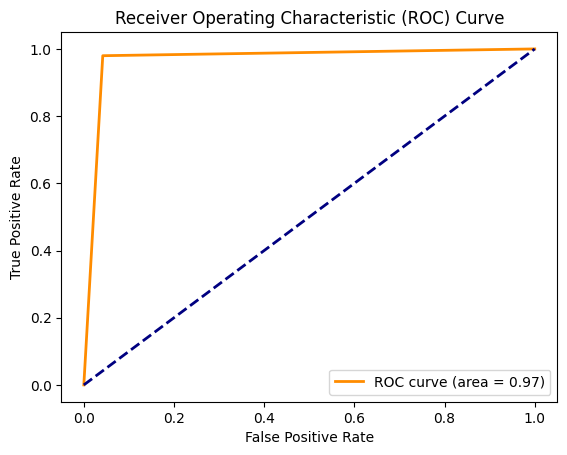

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


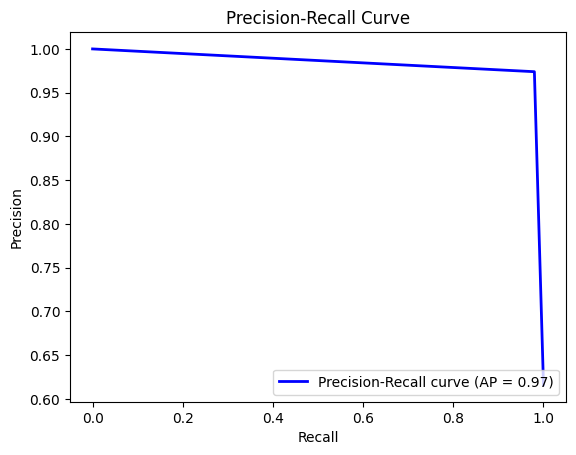

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(cm)

[[4583  201]
 [ 155 7521]]


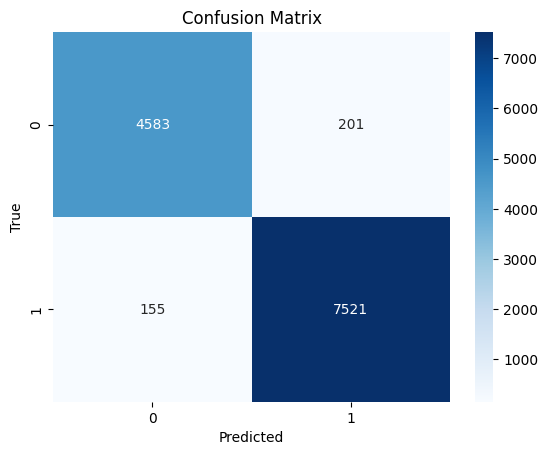

Accuracy: 0.9714
Precision: 0.9740
Recall: 0.9798
F1-Score: 0.9769


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate Metrics
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
